## Анализ безалкогольных напитков ##

### Цель проекта:

* Исследовать соотношение типов напитков, их калорийность и содержание кофеина. * 
* Выявить наиболее калорийные напитки и напитки с высоким содержанием кофеина.
* Определить соотношение кофеина к объему напитка, что может быть полезным для оценки их влияния на организм.

В набор данных включены следующие параметры:

* drink — название напитка;
* type — категория напитка (например, чай, кофе, энергетики и т. д.);
* Calories — количество калорий;
* Caffeine (mg) — содержание кофеина в миллиграммах;
* Volume (ml) — объем напитка в миллилитрах.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

##### Загрузка и предо бработка данных.

Необходимо загрузить данные, удалить дубликаты и привести текстовые данные в единый формат.
Дублированные строки удаляются для повышения точности анализа, а названия напитков нормализуются (приводятся к верхнему регистру и удаляются лишние пробелы).

In [33]:
try:
    data = pd.read_csv('caffeine.csv')
except:
    print('non')

In [34]:
data.drop_duplicates(inplace=True)
data['drink'] = data['drink'].str.upper().str.strip()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


Таблица содержит 610 записей о различных типах безалкогольных напитков.
Данные не содержат дубликатов или пустых записей.

In [35]:
data_by_type = (
    data
    .groupby('type', as_index=False)
    .agg(count=('drink', 'count'))
    .sort_values(by='count', ascending=False)  # Упорядочим для наглядности
)
data_by_type['percent'] = (data_by_type['count'] / data_by_type['count'].sum() * 100).round(2)

Данные группируются по столбцу type, который указывает на тип напитка (например, чай, кофе, энергетик и тд).
Для каждой группы подсчитывается количество записей в столбце drink с помощью метода count.
Данные сортируются в порядке убывания по количеству напитков для каждого типа.
Сортировка делает результат более наглядным, так как наиболее представленные типы напитков оказываются на первых строках.
Для каждого типа напитков вычисляется процент от общего количества напитков:

##### Процент = Количество данного типа / Общее количество напитков × 100

Значение округляется до двух знаков после запятой с помощью .round(2).

Процентное соотношение дает представление о доле каждого типа напитков в общем объеме данных, что важно для анализа структуры данных.

In [36]:
print("Соотношение типов напитков:")
print(data_by_type)

Соотношение типов напитков:
            type  count  percent
1  Energy Drinks    219    35.90
0         Coffee    173    28.36
3    Soft Drinks     90    14.75
4            Tea     66    10.82
2   Energy Shots     36     5.90
5          Water     26     4.26


Итоговая таблица содержит:
Тип напитка (type);
Количество записей (count);
Процентное соотношение (percent)

Energy Drinks - это тип напитка, содержащий стимулирующие компоненты, обычно кофеин, который рекламируется как обеспечивающий умственную и физическую стимуляцию. Может быть газированным или нет, а также может содержать сахар, другие подсластители, экстракты трав, таурин и аминокислоты.

Coffee - напиток из жареных и перемолотых зёрен кофейного дерева или кофейного куста приготовленный по различным рецептам. Чаше всего в качестве добавок используют молоко, сливки, сахар, сиропы, корицу, лёд.

Soft Drinks -  безалкогольный напиток, который обычно содержит газированную воду (хотя некоторые витаминные воды и лимонады не газированы), подсластитель и натуральный или искусственный ароматизатор. Подсластитель может быть сахаром, кукурузным сиропом с высоким содержанием фруктозы, фруктовым соком, заменителем сахара (в случае диетических напитков) или их комбинацией. Освежающие напитки могут также содержать кофеин, красители, консерванты и/или другие ингредиенты.

Tea - напиток, получаемый варкой, завариванием и/или настаиванием листа чайного куста, который предварительно подготавливается специальным образом. В качестве добавок как и в кофе используют молоко, сливки, сахар, сиропы, корицу, лёд.

Energy Shot - это растворимый энергетический напиток. Сбалансированный состав, в который входит таурин, кофеин, л-теанин, витамины и минералы, дает такой же эффект, как банка любого жидкого энергетика.

Water - в данном случае это обычная фильтрованная вода или вода с дбавлением различных подслатителей и тд.

Сформируем диаграмму и посмотрим соотношение записей о различных типах напитков в таблице.

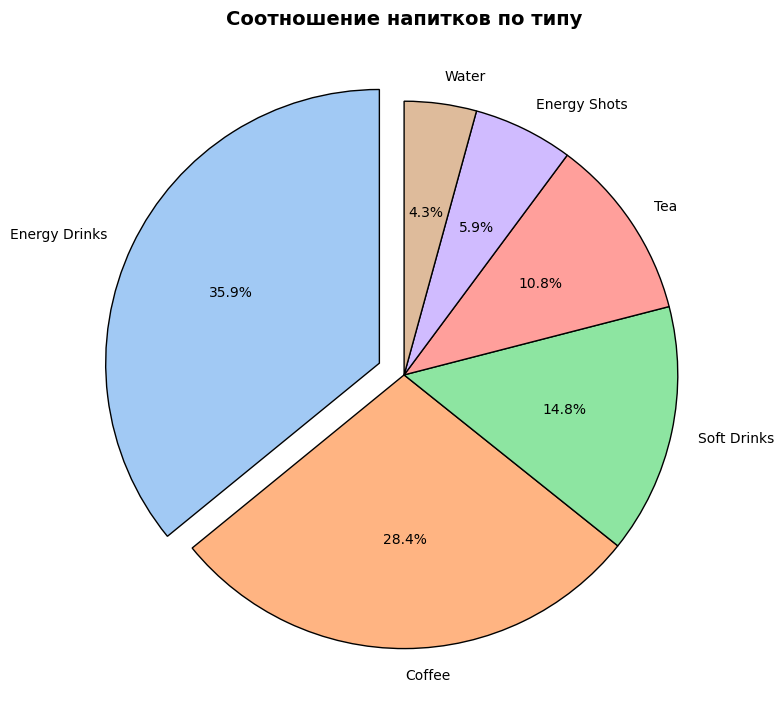

In [37]:
# Визуализация: пироговая диаграмма
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel', len(data_by_type))  # Автоматический выбор цветов
explode = [0.1 if i == max(data_by_type['count']) else 0 for i in data_by_type['count']]

plt.pie(data_by_type['count'],
        labels=data_by_type['type'],
        colors=colors,
        autopct='%1.1f%%',
        explode=explode,
        startangle=90,
        wedgeprops={'edgecolor': 'black'})  # Четкие границы
plt.title('Соотношение напитков по типу', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


На выходе формируется пироговая диаграмма, которая отображает распределение типов напитков по количеству записей в наборе данных 
в процентном соотношении. 
Каждый сегмент диаграммы соответствует определенному типу напитка и показывает его долю в общем объеме данных.

* В наборе данных наибольшую долю занимают энергетические напитки (35.9%), затем идут кофе (28.36%) и безалкогольные газированные напитки (Soft Drinks, 14.75%).
* Чай и энергетические порошки имеют меньшую долю, а вода представлена минимально (4.26%).
* Визуализация в виде пироговой диаграммы и горизонтального столбчатого графика наглядно подчеркивает доминирующую роль энергетиков и кофе в выборке.

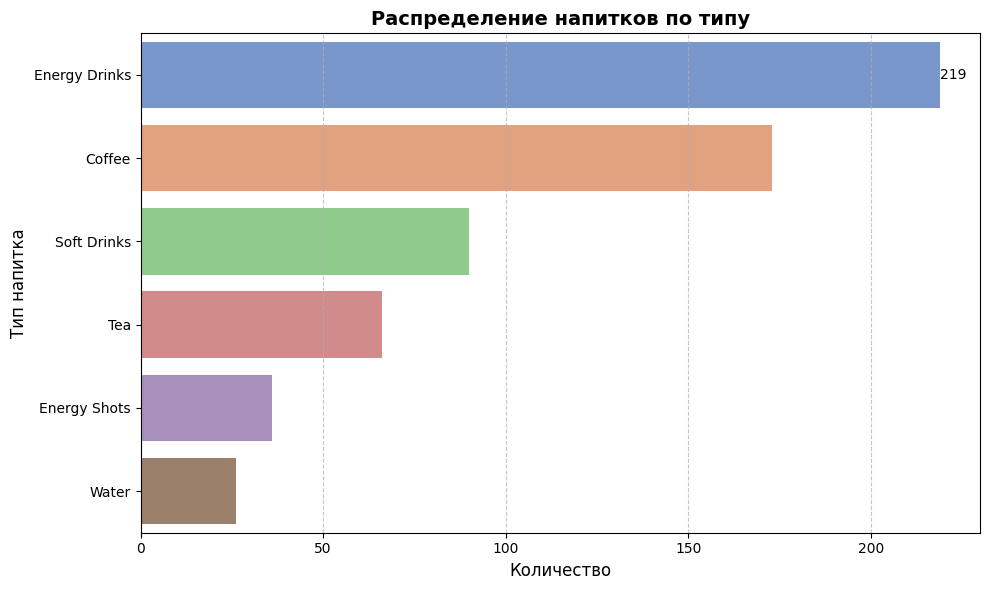

In [38]:
# Визуализация: горизонтальная столбчатая диаграмма
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='count', y='type', hue='type',
                 data=data_by_type,
                 palette='muted',  # Цветовая палитра
                 alpha=0.8)
ax.set_title('Распределение напитков по типу', fontsize=14, fontweight='bold')
ax.set_xlabel('Количество', fontsize=12)
ax.set_ylabel('Тип напитка', fontsize=12)
ax.bar_label(ax.containers[0], fmt='%d')  # Подписи значений на графике
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Сетка только по оси X
plt.tight_layout()
plt.show()

Теперь посмотрим на среднюю калорийность напитков разных типов.

Средняя калорийность по типам напитков:
            type  Calories
3    Soft Drinks    111.11
1  Energy Drinks     86.67
0         Coffee     73.50
4            Tea     52.76
2   Energy Shots     16.50
5          Water     11.54


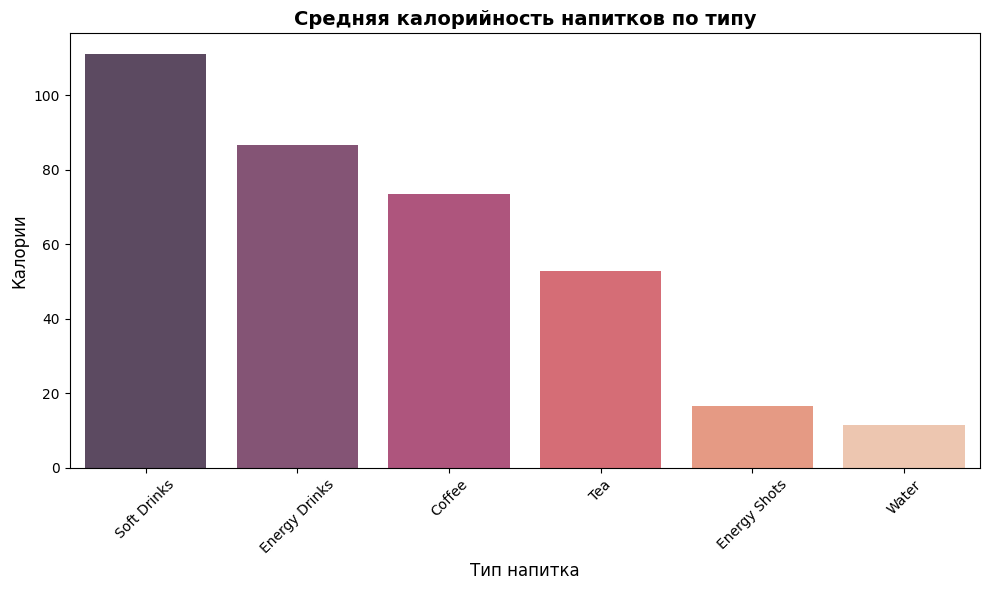

In [29]:
# ---------- Средняя калорийность напитков разных типов ----------
data_by_calories = (
    data
    .groupby('type', as_index=False)['Calories']
    .mean()
    .round(2)
    .sort_values(by='Calories', ascending=False)
)
print("Средняя калорийность по типам напитков:")
print(data_by_calories)

plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='Calories', hue='type',
            data=data_by_calories,
            palette='rocket', alpha=0.8)
plt.title('Средняя калорийность напитков по типу', fontsize=14, fontweight='bold')
plt.xlabel('Тип напитка', fontsize=12)
plt.ylabel('Калории', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Лидеры по калорийности:
  
    * Газированные напитки (Soft Drinks) имеют самую высокую среднюю калорийность (111.11 калорий).
    * Энергетические напитки (86.67 калорий) и кофе (73.50 калорий) также достаточно калорийны.

* Напитки с низкой калорийностью:
    * Вода (11.54 калории) и энергетические порошки (16.50 калорий) практически не содержат калорий.
  
Результаты визуализированы с помощью бар-графика, который демонстрирует значительные различия между типами напитков.

И наконец посмотрим на среднее количество кофеина в различных типах напитков.

Среднее количество кофеина по типам напитков:
            type  Caffeine (mg)
0         Coffee         200.59
2   Energy Shots         193.42
1  Energy Drinks         147.87
4            Tea          55.86
5          Water          53.73
3    Soft Drinks          33.68


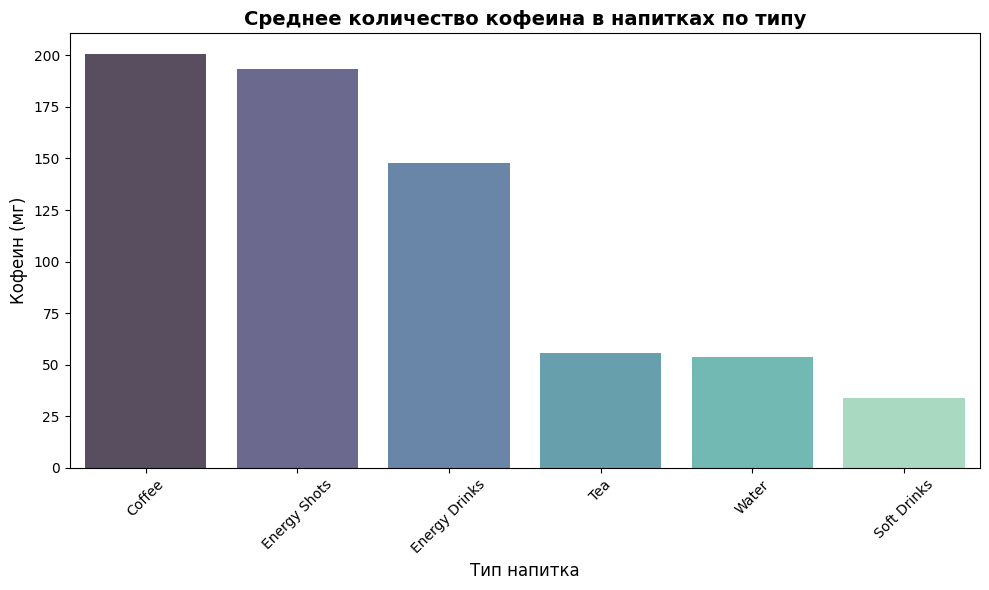

In [40]:
# соотношение среднего колличества кофеина в напитках разных  видов

data_by_caff = (
    data
    .groupby('type', as_index=False)['Caffeine (mg)']
    .mean()
    .round(2)
    .sort_values(by='Caffeine (mg)', ascending=False)
)
print("Среднее количество кофеина по типам напитков:")
print(data_by_caff)

plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='Caffeine (mg)', hue='type',
            data=data_by_caff,
            palette='mako', alpha=0.8,
           legend=False)
plt.title('Среднее количество кофеина в напитках по типу', fontsize=14, fontweight='bold')
plt.xlabel('Тип напитка', fontsize=12)
plt.ylabel('Кофеин (мг)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Напитки с высоким содержанием кофеина:
  
    * Кофе (200.59 мг) и энергетические порошки (193.42 мг) содержат больше всего кофеина в среднем.
      
* Напитки с низким содержанием кофеина:

    * Чай (55.86 мг), вода (53.73 мг) и газированные напитки (33.68 мг) имеют минимальный уровень кофеина.
      
Эта информация может быть важна для людей, контролирующих потребление кофеина по медицинским или личным причинам.

#### Выводы ####

Проведен анализ безалкогольных напитков с целью изучения соотношения типов, калорийности, содержания кофеина и его процентного соотношения к объему. Это может быть полезным для потребителей, стремящихся сделать осознанный выбор в зависимости от их предпочтений или ограничений в рационе.

##### Рекомендации и практическая значимость:

Для тех, кто стремится снизить потребление калорий, стоит обратить внимание на воду, чай или энергетические порошки.
Любителям кофе или энергетических напитков важно учитывать их высокое содержание кофеина, что может повлиять на самочувствие.
Производителям напитков можно рассмотреть необходимость более детального информирования покупателей о составе напитков, чтобы поддерживать тренд осознанного потребления.
